In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

1. Implemente o algoritmo de treinamento do Perceptron e treine-o para as Tabelas Verdade das expressões abaixo (gere os dados usando o site: https://www.calculadoraonline.com.br/tabela-verdade )
1.a) A ∧ B ∧ C
1.b) A ∨ B ∨ C
1.c) A ∧ B ∧ C ∧ D
1.d) A ∨ B ∨ C ∨ D
1.e) A ∧ B ∨ C ∧ D

In [ ]:
def get_xy(a, inicio=0, fim=1):
  x = [x[:len(x) -fim] for x in a]
  y = [x[len(x)- 1] for x in a]
  return (x, y)

In [ ]:
def degrau(x):
  return 1 if x > 0 else 0

def perceptron(X, y, a, numero_de_iteracao):
  n = len(X[0])
  m = len(X)
  w = np.random.randn(n) # pesos
  wz = np.random.randn(1) # threshold
  yt = [0] * m
  erros = []

  for iteracao in range(numero_de_iteracao):
    erro = 0
    for j in range(m):
      yt[j] = degrau(sum([w[i] * X[j][i] + wz for i in range(n)])) # calcula saida
      if y[j] != yt[j]:
        w = [w[i] + a * y[j] * x[j][i] for i in range(n)] # update pesos
        wz = wz + a * y[j] # update threshold
        erro += 1

    erros.append(erro)


  return ([w, wz],erros)


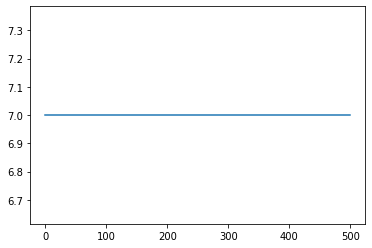

In [ ]:
a = [[1, 1, 1, 1], [1, 1, 0, 0], [1, 0, 1, 0], [0, 1, 1, 0], [0, 0, 1,	0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0]]

x, y = get_xy(a)

w, erros = perceptron(x, y, 0.07, 500)
plt.plot(erros)

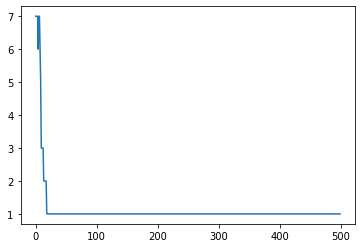

In [ ]:
b = [[1, 1, 1, 1],[1, 1, 0,	1],[1,	0,	1,	1],[0,	1,	1,	1],[0,	0,	1,	1], [0,	1,	0,	1], [1,	0,	0,	1], [0,	0,	0,	0]]

x, y = get_xy(b)

w, erros = perceptron(x, y, 0.02, 500)
plt.plot(erros)

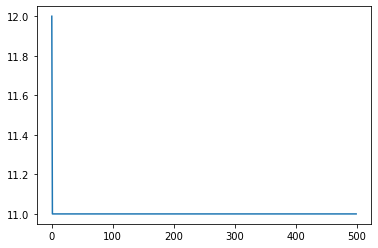

In [ ]:
c = [[1, 1, 1, 1, 1],
[1, 1, 1, 0, 0],
[1, 1, 0, 1, 0],
[1, 0, 1, 1, 0],
[0, 1, 1, 1, 0],
[0, 0, 0, 1, 0],
[0, 0, 1, 0, 0],
[0, 1, 0, 0, 0],
[1, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[1, 1, 0, 0, 0],
[0, 0, 1, 1, 0],
[1, 0, 0, 1, 0],
[0, 1, 1, 0, 0],
[1, 0, 1, 0, 0],
[0, 1, 0, 1, 0]]

x, y = get_xy(c)

w, erros = perceptron(x, y, 0.7123, 500)
plt.plot(erros)

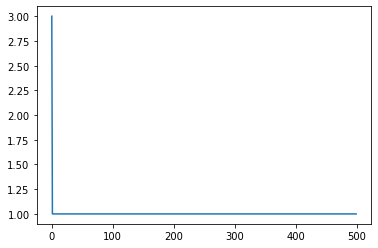

In [ ]:
d = [[1, 1, 1, 1, 1],
[1, 1, 1, 0, 1],
[1, 1, 0, 1, 1],
[1, 0, 1, 1, 1],
[0, 1, 1, 1, 1],
[0, 0, 0, 1, 1],
[0, 0, 1, 0, 1],
[0, 1, 0, 0, 1],
[1, 0, 0, 0, 1],
[0, 0, 0, 0, 0],
[1, 1, 0, 0, 1],
[0, 0, 1, 1, 1],
[1, 0, 0, 1, 1],
[0, 1, 1, 0, 1],
[1, 0, 1, 0, 1],
[0, 1, 0, 1, 1]]

x, y = get_xy(d)

w, erros = perceptron(x, y, 0.07, 500)
plt.plot(erros)

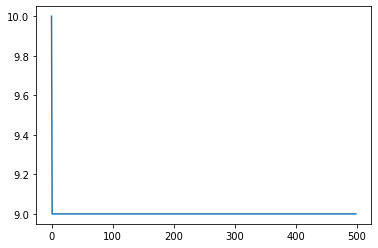

In [ ]:
e = [[1, 1, 1, 1, 1],
[1, 1, 1, 0, 1],
[1, 1, 0, 1, 1],
[1, 0, 1, 1, 1],
[0, 1, 1, 1, 1],
[0, 0, 0, 1, 0],
[0, 0, 1, 0, 0],
[0, 1, 0, 0, 0],
[1, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[1, 1, 0, 0, 1],
[0, 0, 1, 1, 1],
[1, 0, 0, 1, 0],
[0, 1, 1, 0, 0],
[1, 0, 1, 0, 0],
[0, 1, 0, 1, 0]]

x, y = get_xy(e)

w, erros = perceptron(x, y, 0.089, 500)
plt.plot(erros)

2. Seja o arquivo Titanic.csv em anexo, que contém a lista com os passageiros do RMS Titanic que naufragou em 1912. O arquivo contém os seguintes campos:
Classe = {1,2,3} : A classe do passageiro
Idade = [0, 100]: A idade do passageiro [contém valores nulos!]
Sexo = {0,1}: O sexo do passageiro, onde 0 = Masculino e 1 = Feminino
Sobreviveu = {0,1}: Se o passageiro sobreviveu(1) ou não (0).


2.a) Implemente o algoritmo de treinamento do ADALINE

In [ ]:

def degrau(x):
  return 1 if x > 0 else 0

def estimativa(w, wz, X):
  return degrau(sum([(w[i] * X[i] + wz) for i in range(len(X))]))


def adaline_fit(X, Y, a, numero_de_iteracao):
  n = len(X[0]) # número de variaveis
  m = len(X) # número de instacia
  w = np.random.randn(n) # pesos
  wz = np.random.randn(1) # threshold
  yt = [0] * m 
  erro = [0] * m
  
  for iteracao in range(numero_de_iteracao):
    for j in range(m):
      yt[j] = estimativa(w, wz, X[j])
      erro[j] = Y[j] - yt[j]
      w = [w[i] + a * erro[j] * X[j][i] for i in range(n)]
      wz = wz + a * erro[j]
    
  return [wz, w]
    

In [ ]:
df = pd.read_csv('/content/Titanic.csv')
df.head()

,Nome,Idade,Sexo,Sobreviveu
0,1.0,29.00,1,1
1,1.0,2.00,1,0
2,1.0,30.00,0,0
3,1.0,25.00,1,0
4,1.0,0.92,0,1


In [ ]:
df['Idade'] = df['Idade'].fillna(round(df['Idade'].mean())) # subistituindo idades null com a media das idade
df = df.dropna()
df_list = df.values.tolist()

In [ ]:
def get_xy_especifico(columns):
  return (df[columns].values.tolist(), df['Sobreviveu'].tolist())


2.b) Usando o algoritmo implementado, treine um modelo para prever a variável Sobreviveu com base em cada uma das variáveis isoladamente;


In [ ]:
variaveis = ['Nome', 'Idade', 'Sexo']
for i in variaveis:
  x, y = get_xy_especifico([i])

  w = adaline_fit(x, y, 0.02, 200)
  yt = [estimativa(w[1], w[0], x[j]) for j in range(len(x))]
  acuracia = accuracy_score(yt, y)  
  print(f'para {i} Acurácia: {acuracia:.4f}' )

para Nome Acurácia: 0.7058
para Idade Acurácia: 0.6730
para Sexo Acurácia: 0.6570


2.c) Usando o algoritmo implementado, treine um modelo para prever a
variável Sobreviveu com base em pares das variáveis;


In [ ]:
for var1 in variaveis:
  for var2 in variaveis:
    if var1 != var2:
      x, y = get_xy_especifico([var1, var2])

      w = adaline_fit(x, y, 0.05, 100)
      yt = [estimativa(w[1], w[0], x[j]) for j in range(len(x))]
      acuracia = accuracy_score(yt, y)  
      print(f'para {var1} e {var2} Acurácia: {acuracia:.4f}' )

para Nome e Idade Acurácia: 0.6936
para Nome e Sexo Acurácia: 0.7058
para Idade e Nome Acurácia: 0.6890
para Idade e Sexo Acurácia: 0.6974
para Sexo e Nome Acurácia: 0.7058
para Sexo e Idade Acurácia: 0.6753


2.d) Usando o algoritmo implementado, treine um modelo para prever a
variável Sobreviveu com base em todas as outras variáveis;

In [ ]:
x, y = get_xy_especifico(variaveis)

w = adaline_fit(x, y, 0.73, 100)
yt = [estimativa(w[1], w[0], x[j]) for j in range(len(x))]
acuracia = accuracy_score(yt, y)  
print(f'Acurácia: {acuracia:.4f}' )

Acurácia: 0.7500
